#  Loan Rejection or Approval Status Prediction

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load the Dataset

In [2]:
df=pd.read_csv(r'C:\Users\HP\Desktop\data analytics\data set\ml project\loan_approval_dataset.csv')

# Understanding of Data

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [5]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [6]:
df.shape

(4269, 13)

In [7]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
df.describe(include="object")

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [12]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [13]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

# Data Cleaning Data Preprocessing

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [15]:
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for: {col}")
    print(df[col].value_counts())
    print("***" * 10)

Value counts for:  education
 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
******************************
Value counts for:  self_employed
 self_employed
Yes    2150
No     2119
Name: count, dtype: int64
******************************
Value counts for:  loan_status
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
******************************


In [16]:
df.columns = df.columns.str.lstrip()

In [17]:
numerical_columns=['loan_id','no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value',
                   'commercial_assets_value','luxury_assets_value','bank_asset_value']
categorical_columns = df.select_dtypes(include=['object']).columns

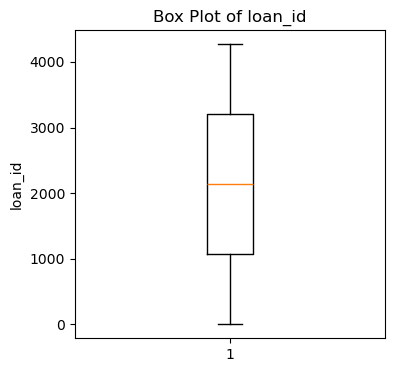

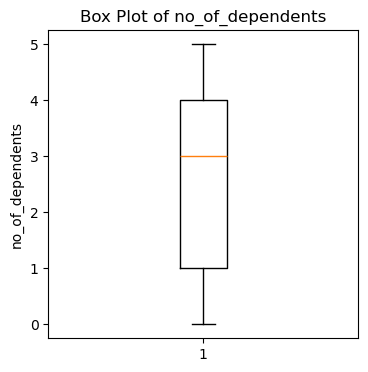

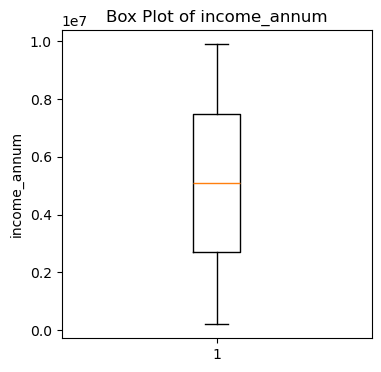

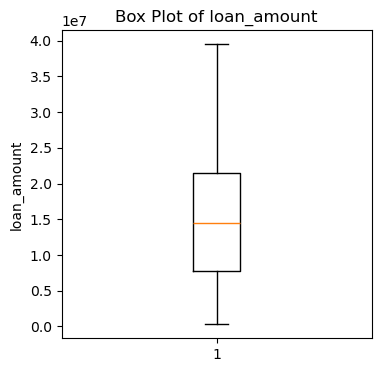

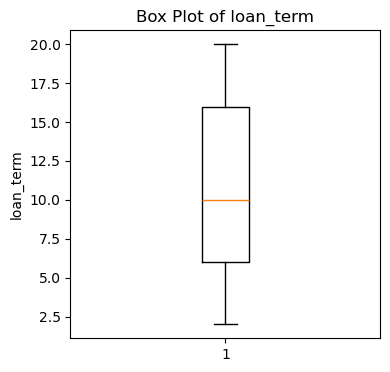

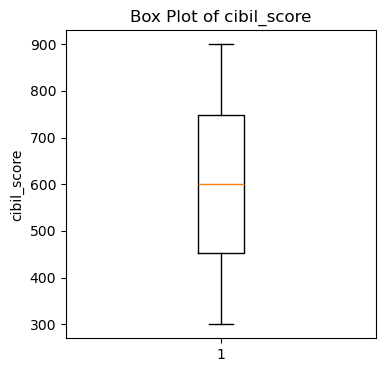

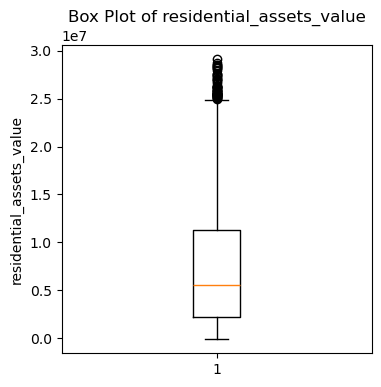

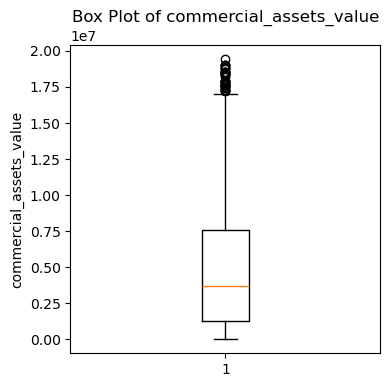

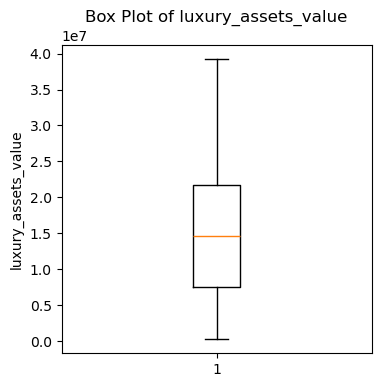

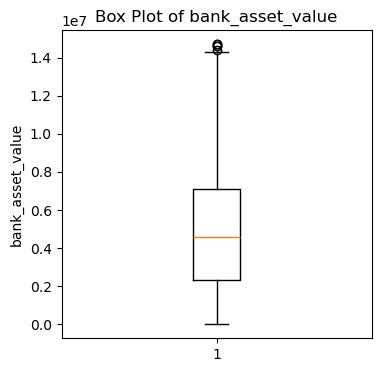

In [18]:
for col in numerical_columns:
    plt.figure(figsize=(4, 4))
    plt.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

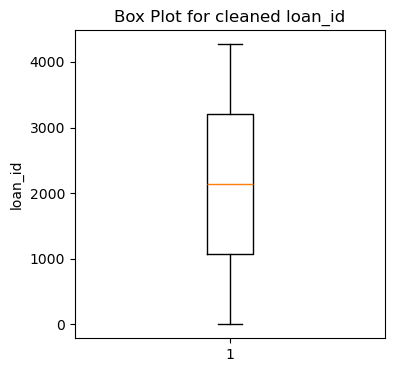

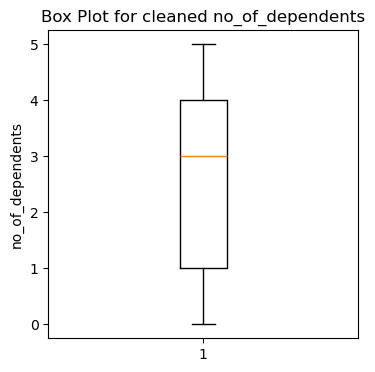

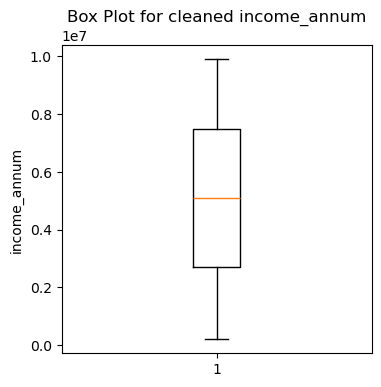

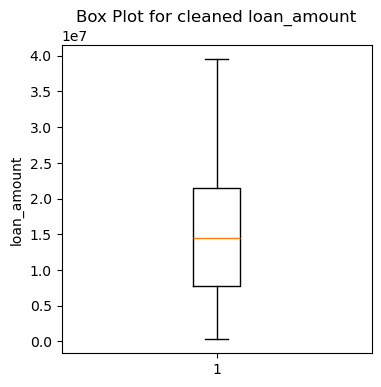

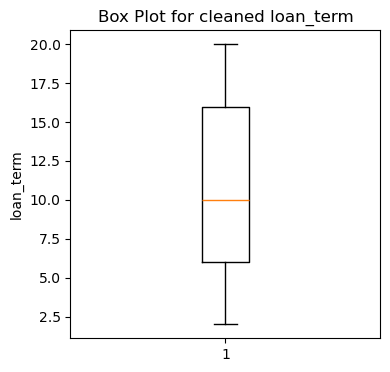

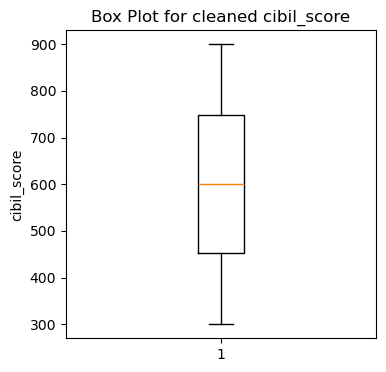

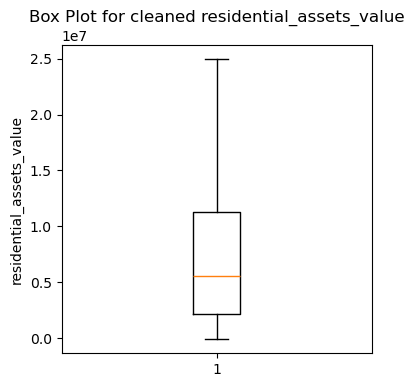

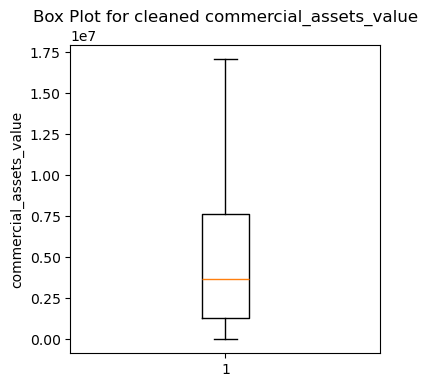

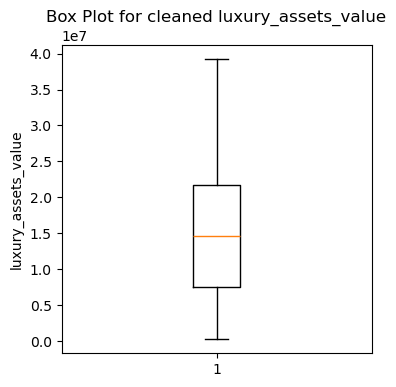

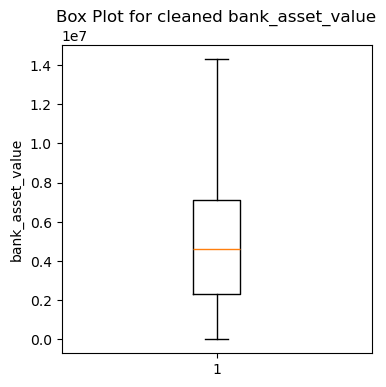

In [19]:
outliers=['residential_assets_value','commercial_assets_value','bank_asset_value']
for col in outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # Replace values above upper with upper, below lower with lower
    df[col] = df[col].clip(lower, upper)
for col in numerical_columns:
    plt.figure(figsize=(4, 4))
    plt.boxplot(df[col])
    plt.title(f'Box Plot for cleaned {col}')
    plt.ylabel(col)
    plt.show()

# Exploratory Data Analysis (EDA)

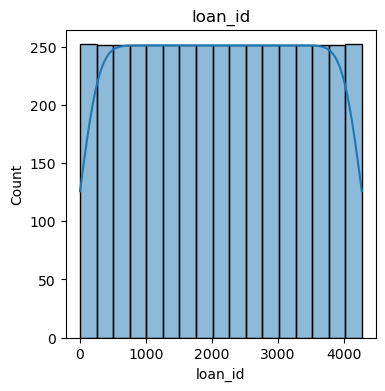

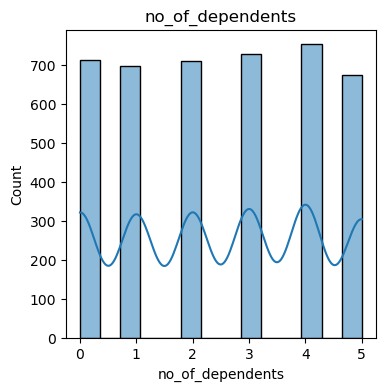

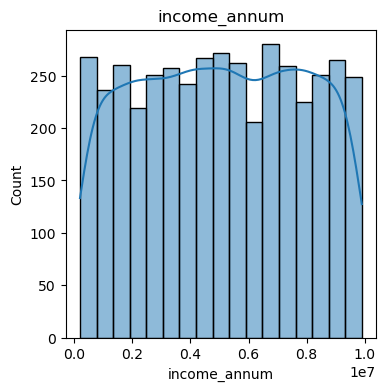

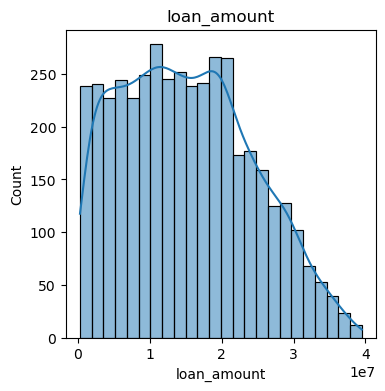

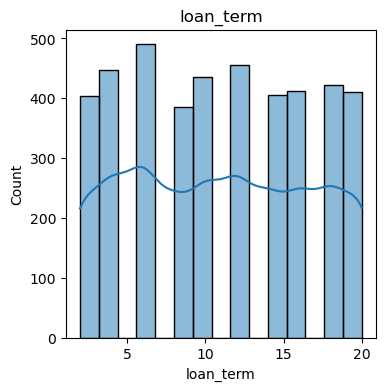

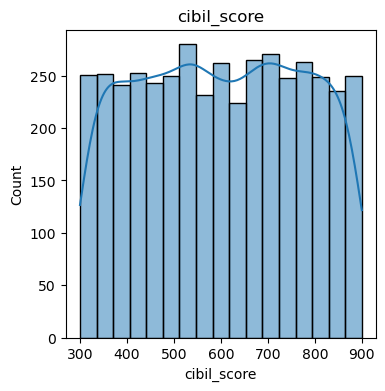

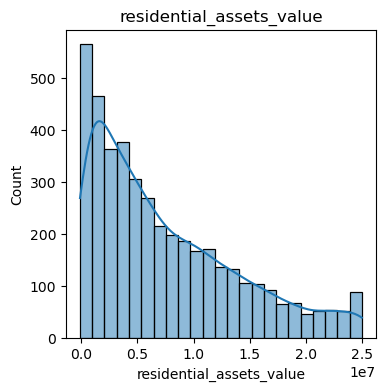

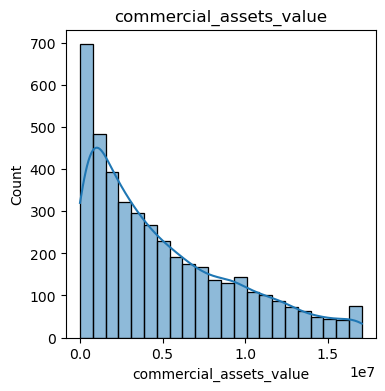

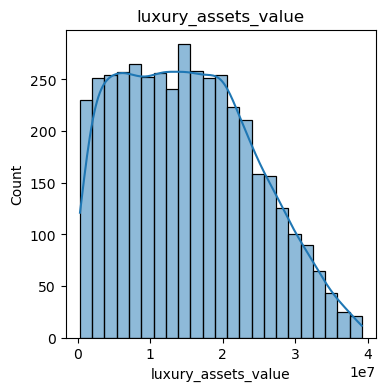

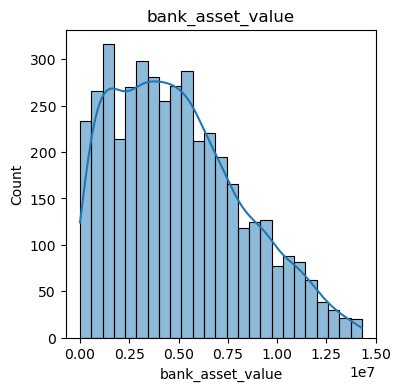

In [20]:
# To Understand Data Distribution
for col in numerical_columns:
    plt.figure(figsize=(4,4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

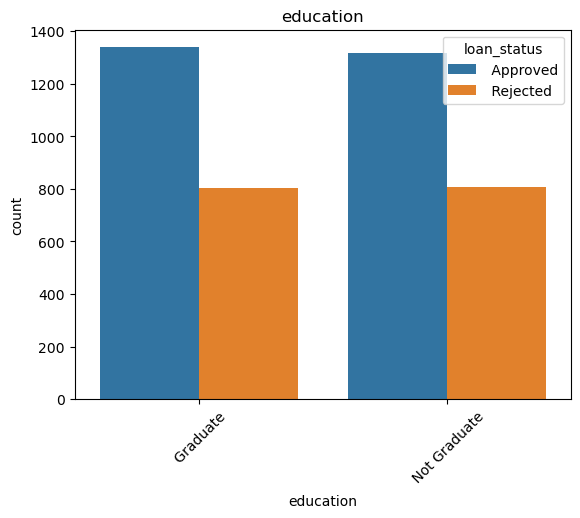

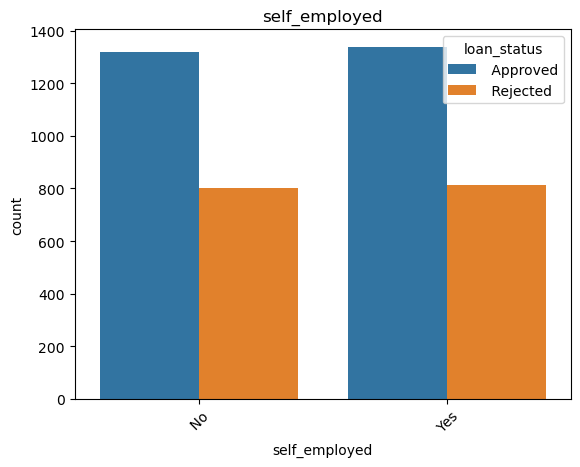

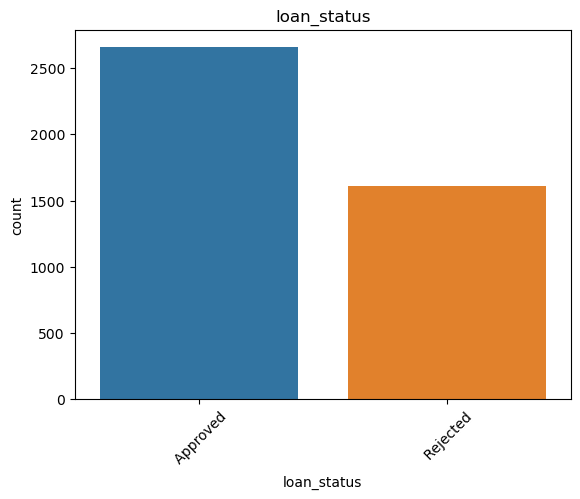

In [21]:
for col in categorical_columns:
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

# Encoding

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [23]:
a=LabelEncoder()
df['education']=a.fit_transform(df['education'])
df['self_employed']=a.fit_transform(df['self_employed'])
df['loan_status']=a.fit_transform(df['loan_status'])

# Correlation

In [24]:
correlation =df.corr()
correlation

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,-0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.021008,0.019050,-0.000862,0.010824,-0.017685
no_of_dependents,0.005326,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007111,-0.001598,0.002817,0.011126,0.018114
education,-0.015536,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.011486,0.006211,-0.012471,-0.009492,0.004918
self_employed,0.001745,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006732,-0.018597,0.004413,-0.000163,-0.000345
income_annum,0.012592,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.637557,0.640824,0.929145,0.851177,0.015189
loan_amount,0.008170,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.595807,0.603251,0.860914,0.788207,-0.016150
loan_term,0.009809,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.007592,-0.005598,0.012490,0.017117,0.113036
cibil_score,0.016323,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.020578,-0.003203,-0.028618,-0.015414,-0.770518
residential_assets_value,0.021008,0.007111,-0.011486,0.006732,0.637557,0.595807,0.007592,-0.020578,1.000000,0.415983,0.592013,0.528202,0.014985
commercial_assets_value,0.019050,-0.001598,0.006211,-0.018597,0.640824,0.603251,-0.005598,-0.003203,0.415983,1.000000,0.591943,0.548791,-0.008799


In [25]:
df=df.drop(columns=['loan_id'])

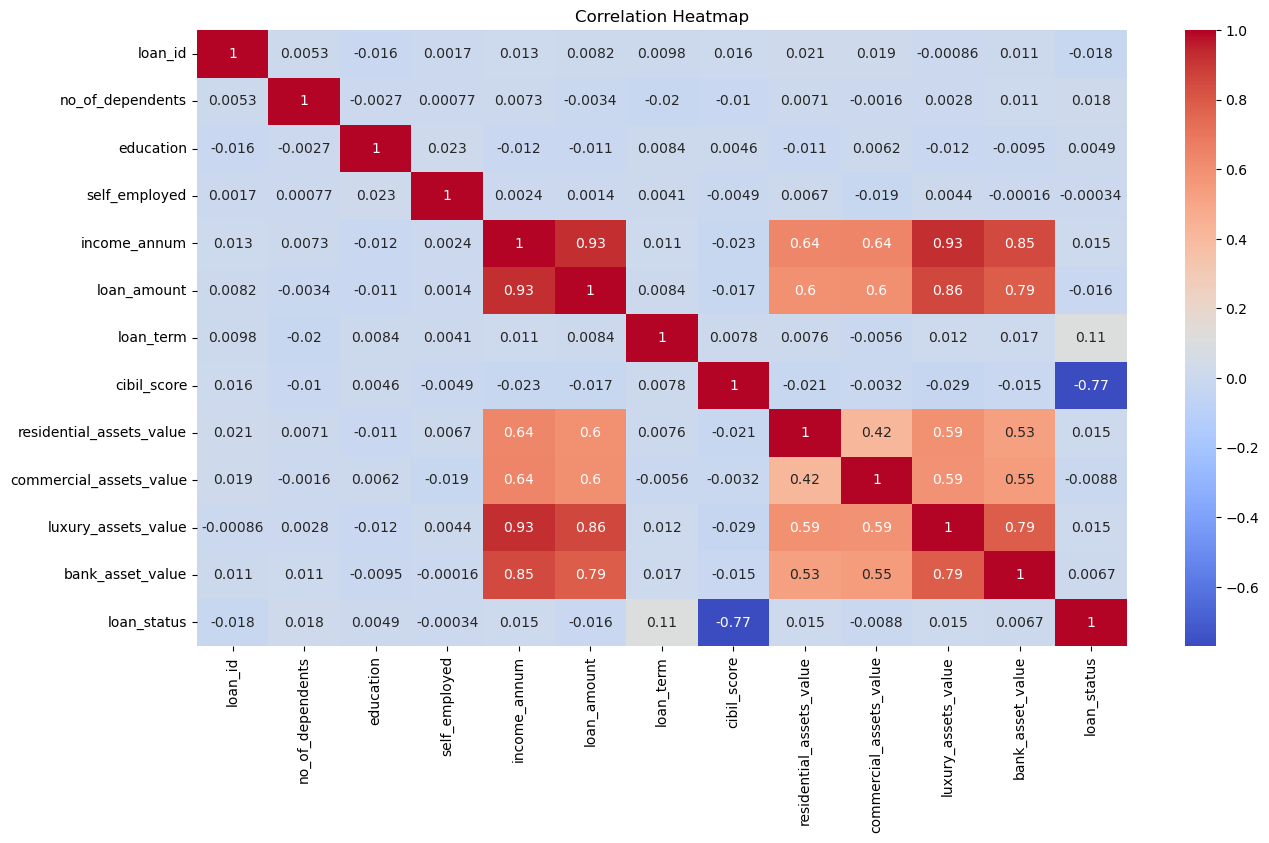

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
x=df.drop(columns=['loan_status'])
y=df['loan_status']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
numerical_columns=['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value',
                   'commercial_assets_value','luxury_assets_value','bank_asset_value']

In [30]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[numerical_columns])
x_test_scaled  = scaler.transform(x_test[numerical_columns])

# Modeling & Evaluation

In [31]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred=lr.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
lr_test_acc = accuracy_score(y_test, y_pred)
print("Accuracy:\n",lr_test_acc)
lr_test_ps=precision_score(y_test, y_pred)
print("precision score:\n",lr_test_ps)
lr_test_rs=recall_score(y_test, y_pred)
print("recall score:\n",lr_test_rs)
lr_test_cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",lr_test_cm)
lr_test_f1=f1_score(y_test,y_pred)
print("f1 score:\n",lr_test_f1)

predicted [0 0 1 ... 0 0 0]
actual: [1 0 1 ... 0 1 1]
Accuracy:
 0.7256554307116105
precision score:
 0.7621621621621621
recall score:
 0.36153846153846153
confusion matrix:
 [[634  44]
 [249 141]]
f1 score:
 0.49043478260869566


In [33]:
lr_y_test_prob = lr.predict_proba(x_test)[:, 1]

In [34]:
y_pred=lr.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
lr_train_accuracy=accuracy_score(y_train,y_pred)
lr_train_accuracy

predicted [1 1 0 ... 1 0 0]
actual: [1 0 1 ... 0 1 1]


0.7353951890034365

In [35]:
############################
lr= LogisticRegression()
lr.fit(x_train_scaled, y_train)        
y_pred = lr.predict(x_test_scaled)     

lr_scaled_f1= f1_score(y_test, y_pred)             
print("R² score:", lr_scaled_f1)


R² score: 0.8656330749354005


In [36]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
y_pred=dt.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
dt_test_acc = accuracy_score(y_test, y_pred)
print("Accuracy:\n",dt_test_acc)
dt_test_ps=precision_score(y_test, y_pred)
print("precision score:\n",dt_test_ps)
dt_test_rs=recall_score(y_test, y_pred)
print("recall score:\n",dt_test_rs)
dt_test_cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",dt_test_cm)
dt_test_f1=f1_score(y_test,y_pred)
print("f1 score:\n",dt_test_f1)

predicted [1 0 1 ... 0 1 1]
actual: [1 0 1 ... 0 1 1]
Accuracy:
 0.9831460674157303
precision score:
 0.9818652849740933
recall score:
 0.9717948717948718
confusion matrix:
 [[671   7]
 [ 11 379]]
f1 score:
 0.9768041237113402


In [38]:
dt_y_test_prob = dt.predict_proba(x_test)[:, 1]

In [39]:
y_pred=dt.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
dt_train_accuracy=accuracy_score(y_train,y_pred)
dt_train_accuracy

predicted [1 1 0 ... 1 1 0]
actual: [1 0 1 ... 0 1 1]


1.0

In [40]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred=rf.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
rf_test_acc = accuracy_score(y_test, y_pred)
print("Accuracy:\n",rf_test_acc)
rf_test_ps=precision_score(y_test, y_pred)
print("precision score:\n",rf_test_ps)
rf_test_rs=recall_score(y_test, y_pred)
print("recall score:\n",rf_test_rs)
rf_test_cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",rf_test_cm)
rf_test_f1=f1_score(y_test,y_pred)
print("f1 score:\n",rf_test_f1)

predicted [1 0 1 ... 0 1 1]
actual: [1 0 1 ... 0 1 1]
Accuracy:
 0.9850187265917603
precision score:
 0.9844559585492227
recall score:
 0.9743589743589743
confusion matrix:
 [[672   6]
 [ 10 380]]
f1 score:
 0.979381443298969


In [42]:
rf_y_test_prob = rf.predict_proba(x_test)[:, 1]

In [43]:
y_pred=rf.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
rf_train_accuracy=accuracy_score(y_train,y_pred)
rf_train_accuracy

predicted [1 1 0 ... 1 1 0]
actual: [1 0 1 ... 0 1 1]


1.0

In [44]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=4,random_state=42)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [45]:
y_pred=gbc.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
gbc_test_acc = accuracy_score(y_test, y_pred)
print("Accuracy:\n",gbc_test_acc)
gbc_test_ps=precision_score(y_test, y_pred)
print("precision score:\n",gbc_test_ps)
gbc_test_rs=recall_score(y_test, y_pred)
print("recall score:\n",gbc_test_rs)
gbc_test_cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",gbc_test_cm)
gbc_test_f1=f1_score(y_test,y_pred)
print("f1 score:\n",gbc_test_f1)

predicted [1 0 1 ... 0 1 1]
actual: [1 0 1 ... 0 1 1]
Accuracy:
 0.9822097378277154
precision score:
 0.9843342036553525
recall score:
 0.9666666666666667
confusion matrix:
 [[672   6]
 [ 13 377]]
f1 score:
 0.9754204398447607


In [46]:
gbc_y_test_prob = gbc.predict_proba(x_test)[:, 1]

In [47]:
y_pred=gbc.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
gbc_train_accuracy=accuracy_score(y_train,y_pred)
gbc_train_accuracy

predicted [1 1 0 ... 1 1 0]
actual: [1 0 1 ... 0 1 1]


1.0

In [48]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred=knn.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
knn_test_acc = accuracy_score(y_test, y_pred)
print("Accuracy:\n",knn_test_acc)
knn_test_ps=precision_score(y_test, y_pred)
print("precision score:\n",knn_test_ps)
knn_test_rs=recall_score(y_test, y_pred)
print("recall score:\n",knn_test_rs)
knn_test_cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",knn_test_cm)
knn_test_f1=f1_score(y_test,y_pred)
knn_test_f1

predicted [0 1 1 ... 1 0 1]
actual: [1 0 1 ... 0 1 1]
Accuracy:
 0.5908239700374532
precision score:
 0.41754385964912283
recall score:
 0.30512820512820515
confusion matrix:
 [[512 166]
 [271 119]]


0.35259259259259257

In [50]:
knn_y_test_prob = knn.predict_proba(x_test)[:, 1]

In [51]:
y_pred=knn.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
knn_train_accuracy=accuracy_score(y_train,y_pred)
knn_train_accuracy

predicted [0 1 0 ... 0 1 0]
actual: [1 0 1 ... 0 1 1]


0.7138394251796314

In [52]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [53]:
y_pred=gnb.predict(x_test)
print("predicted",y_pred)
print("actual:",y_test.values)
gnb_test_acc = accuracy_score(y_test, y_pred)
print("Accuracy:\n",gnb_test_acc)
gnb_test_ps=precision_score(y_test, y_pred)
print("precision score:\n",gnb_test_ps)
gnb_test_rs=recall_score(y_test, y_pred)
print("recall score:\n",gnb_test_rs)
gnb_test_cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",gnb_test_cm)
gnb_test_f1=f1_score(y_test,y_pred)
gnb_test_f1

predicted [1 0 0 ... 0 0 0]
actual: [1 0 1 ... 0 1 1]
Accuracy:
 0.7771535580524345
precision score:
 0.9175824175824175
recall score:
 0.4282051282051282
confusion matrix:
 [[663  15]
 [223 167]]


0.583916083916084

In [54]:
gnb_y_test_prob = gnb.predict_proba(x_test)[:, 1]

In [55]:
y_pred=gnb.predict(x_train)
print("predicted",y_pred)
print("actual:",y_test.values)
gnb_train_accuracy=accuracy_score(y_train,y_pred)
gnb_train_accuracy

predicted [1 1 0 ... 1 0 0]
actual: [1 0 1 ... 0 1 1]


0.7722586691658857

In [56]:
# sc=SVC(kernel='linear')
# sc.fit(x_train,y_train)

In [57]:
# y_pred=sc.predict(x_test)
# print("predicted",y_pred)
# print("actual:",y_test.values)
# sc_test_acc = accuracy_score(y_test, y_pred)
# print("Accuracy:\n",sc_test_acc)
# sc_test_ps=precision_score(y_test, y_pred)
# print("precision score:\n",sc_test_ps)
# sc_test_rs=recall_score(y_test, y_pred)
# print("recall score:\n",sc_test_rs)
# sc_test_cm = confusion_matrix(y_test, y_pred)
# print("confusion matrix:\n",sc_test_cm)
# sc_test_f1=f1_score(y_test,y_pred)
# sc_test_f1

In [58]:
# sc_y_test_prob = sc.predict_proba(x_test)[:, 1]

In [59]:
# y_pred=sc.predict(x_train)
# print("predicted",y_pred)
# print("actual:",y_test.values)
# sc_train_f1=accuracy_score(y_train,y_pred)
# sc_train_accuracy

In [60]:
# ##################
# sc=SVC(kernel='linear')
# sc.fit(x_train_scaled, y_train)        
# y_pred = sc.predict(x_test_scaled)     

# f1 = f1_score(y_test, y_pred)             
# print("R² score:", f1)

# Model Selection

In [61]:
results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "KNN",
        "Gaussian NB",
        # "SVC"
    ],
    
    "Train Accuracy": [
        lr_train_accuracy,
        dt_train_accuracy,
        rf_train_accuracy,
        gbc_train_accuracy,
        knn_train_accuracy,
        gnb_train_accuracy,
        # sc_train_accuracy
        
    ],

    "Test Accuracy": [
        lr_test_acc,
        dt_test_acc,
        rf_test_acc,
        gbc_test_acc,
        knn_test_acc,
        gnb_test_acc,
        # sc_test_acc

    ],
    
    "Precision": [
        lr_test_ps,
        dt_test_ps,
        rf_test_ps,
        gbc_test_ps,
        knn_test_ps,
        gnb_test_ps,
        # sc_test_ps
    ],
    
    "Recall": [
        lr_test_rs,
        dt_test_rs,
        rf_test_rs,
        gbc_test_rs,
        knn_test_rs,
        gnb_test_rs,
        # sc_test_rs
    ],
    
    "F1 Score": [
        lr_test_f1,
        dt_test_f1,
        rf_test_f1,
        gbc_test_f1,
        knn_test_f1,
        gnb_test_f1,
        # sc_test_f1
    ]
})
results.sort_values(by="F1 Score", ascending=False)
# Detect overfitting / underfitting
results["Accuracy Gap"] = results["Train Accuracy"] - results["Test Accuracy"]
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Accuracy Gap
0,Logistic Regression,0.735395,0.725655,0.762162,0.361538,0.490435,0.009740
1,Decision Tree,1.000000,0.983146,0.981865,0.971795,0.976804,0.016854
2,Random Forest,1.000000,0.985019,0.984456,0.974359,0.979381,0.014981
3,Gradient Boosting,1.000000,0.982210,0.984334,0.966667,0.975420,0.017790
4,KNN,0.713839,0.590824,0.417544,0.305128,0.352593,0.123015
5,Gaussian NB,0.772259,0.777154,0.917582,0.428205,0.583916,-0.004895


# Model Evaluation & Insights

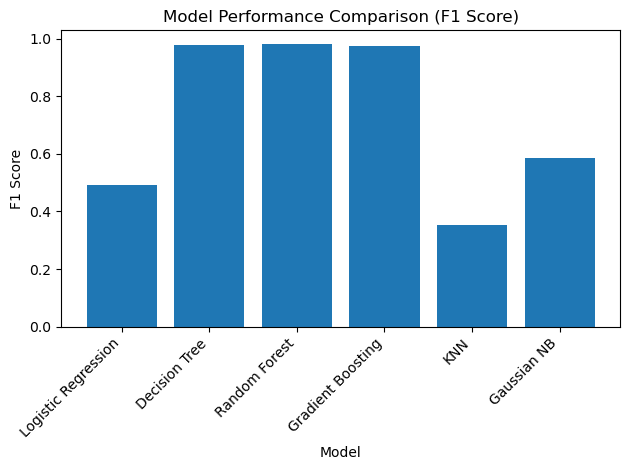

In [62]:
# 1️⃣ Model Performance Comparison Chart (F1 Score)
plt.figure()
plt.bar(results["Model"], results["F1 Score"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.title("Model Performance Comparison (F1 Score)")
plt.tight_layout()
plt.show()
# # Insights
# Random Forest achieved the highest F1 score (~0.98), indicating the best overall classification performance.
# Decision Tree and Gradient Boosting also performed very well, but slightly lower than Random Forest.
# Gaussian Naive Bayes showed moderate performance, with good precision but lower recall.
# Logistic Regression struggled due to low recall, missing many positive cases.
# KNN performed the worst, indicating poor generalization on this dataset.

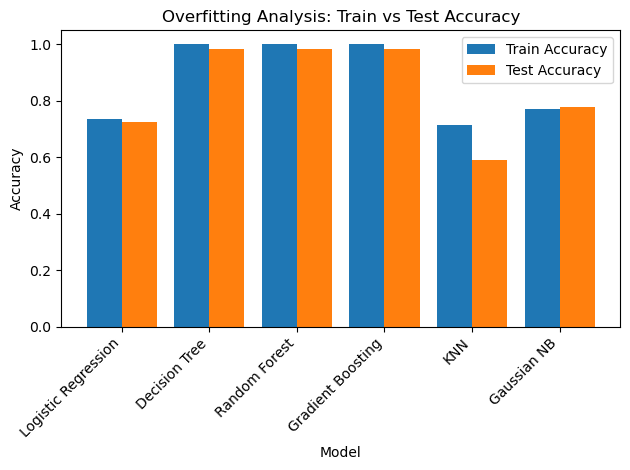

In [63]:
# 2️⃣ Overfitting Analysis
x = np.arange(len(results["Model"]))
plt.figure()
plt.bar(x - 0.2, results["Train Accuracy"], width=0.4, label="Train Accuracy")
plt.bar(x + 0.2, results["Test Accuracy"], width=0.4, label="Test Accuracy")
plt.xticks(x, results["Model"], rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis: Train vs Test Accuracy")
plt.legend()
plt.tight_layout()
plt.show()
# Insights
# 1️⃣ Well-Generalized Models
# Random Forest
# Small accuracy gap
# High test accuracy
# Best generalization
# Gradient Boosting
# Slight overfitting but acceptable
# Strong test performance
# 2️⃣ Overfitting Models
# Decision Tree
# Train Accuracy = 1.00
# Indicates memorization
# Ensemble models improved this
# 3️⃣ Underfitting Models
# Logistic Regression
# Low train & test accuracy
# Cannot capture complex patterns
# KNN
# Large accuracy gap
# Poor generalization

In [67]:
# roc_auc_score
lr_auc = roc_auc_score(y_test, lr_y_test_prob)
dt_auc = roc_auc_score(y_test, dt_y_test_prob)
rf_auc = roc_auc_score(y_test, rf_y_test_prob)
gbc_auc = roc_auc_score(y_test, gbc_y_test_prob)
knn_auc = roc_auc_score(y_test, knn_y_test_prob)
gnb_auc = roc_auc_score(y_test, gnb_y_test_prob)
print("lr ROC-AUC:",lr_auc)
print("dt ROC-AUC:",dt_auc)
print("rf ROC-AUC:",rf_auc)
print("gbc ROC-AUC:",gbc_auc)
print("knn ROC-AUC:",knn_auc)
print("gnb ROC-AUC:",gnb_auc)

lr ROC-AUC: 0.7933666137205959
dt ROC-AUC: 0.9807351940095304
rf ROC-AUC: 0.9989694425535134
gbc ROC-AUC: 0.9986385296119811
knn ROC-AUC: 0.5472146584978443
gnb ROC-AUC: 0.9393880946978292


# Conclusion

In [69]:
import joblib
all_models = {
    "LogisticRegression":lr,
    "DecisionTreeClassifier":dt,
    "Random Forest":rf,
    "GradientBoostingClassifier":gbc,
    "KNeighborsClassifier":knn,
    "GaussianNB":gnb
    # "SVC":svr
}
"LogisticRegression", "DecisionTreeClassifier", "Random Forest","GradientBoostingClassifier","KNeighborsClassifier","GaussianNB"

('LogisticRegression',
 'DecisionTreeClassifier',
 'Random Forest',
 'GradientBoostingClassifier',
 'KNeighborsClassifier',
 'GaussianNB')

In [72]:
# Final selected model: Random Forest
final_model=RandomForestClassifier(n_estimators=100,random_state=42)
final_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [73]:
joblib.dump(final_model, "Loan_model.pkl")

['Loan_model.pkl']